In [1]:
## source = https://github.com/jorditorresBCN/DEEP-LEARNING-practical-introduction-with-Keras

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

In /Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/joseangelvelasco/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/josean

In [3]:
def linear(x):
    a = []
    for item in x:
        a.append(item)
    return a

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)

def relu(x):
    a = []
    for item in x:
        if item > 0:
            a.append(item)
        else:
            a.append(0)
    return a

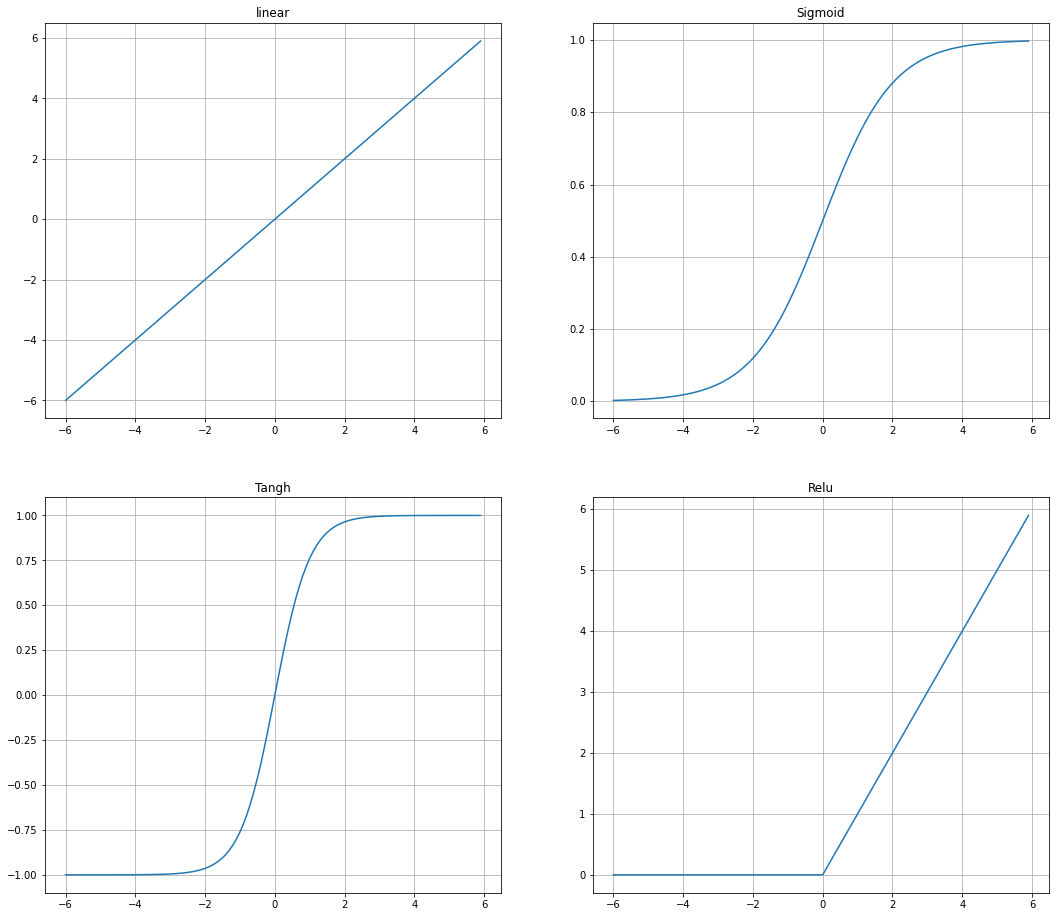

In [6]:
x = np.arange(-6, 6, 0.1)

y1 = linear(x)
y2 = sigmoid(x)
y3 = tanh(x)
y4 = relu(x)

plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
plt.plot(x,y1)
plt.grid()
plt.title('linear')

plt.subplot(2,2,2)
plt.plot(x,y2)
plt.grid()
plt.title('Sigmoid')

plt.subplot(2,2,3)
plt.plot(x,y3)
plt.grid()
plt.title('Tangh')

plt.subplot(2,2,4)
plt.plot(x,y4)
plt.grid()
plt.title('Relu')

plt.show()

In [7]:
import keras
print(keras.__version__)

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = train_images.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

from keras.utils import to_categorical

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

Using TensorFlow backend.


2.3.1


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import sgd

"""Sigmoid"""
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.summary()

batch_size = 100
num_classes = 10
epochs=5

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

test_loss, test_acc = model.evaluate(x_test, y_test)
print('\n')
print('---Sigmoid---')
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 31us/step


---Sigmoid---
Test loss: 1.2588097021102904
Test accuracy: 0.777899980545044


In [9]:
"""Relu"""
batch_size = 100
num_classes = 10
epochs=5

model2 = Sequential()
model2.add(Dense(10, activation='relu', input_shape=(784,)))
model2.add(Dense(10, activation='softmax'))


model2.summary()


model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

test_loss, test_acc = model2.evaluate(x_test, y_test)
print('\n')
print('---Relu---')
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 34us/step


---Relu---
Test loss: 0.377574406850338
Test accuracy: 0.8952999711036682


In [10]:
"""512 Nodes"""

model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(784,)))
model3.add(Dense(10, activation='softmax'))

model3.summary()

model3.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

epochs = 10
model3.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=0
           )

test_loss, test_acc = model3.evaluate(x_test, y_test)
print('\n')
print('---Relu (512)---:')
print('Model3 - Test loss:', test_loss)
print('Model3 - Test accuracy:', test_acc)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 1s 83us/step


---Relu (512)---:
Model3 - Test loss: 0.24026147207915782
Model3 - Test accuracy: 0.9319999814033508
